In [98]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd

plt.rcParams['font.family'] = ['Times New Roman', 'SimSun']
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['font.size'] = 42
plt.rcParams['font.weight'] = 'bold'

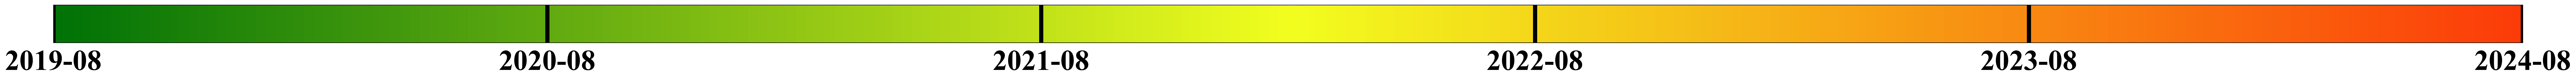

In [ ]:
start_color = [0, 114, 6]
mid_color = [242, 254, 30]
end_color = [252, 59, 9]

def normalize_color(rgb):
    return [x/255.0 for x in rgb]

positions = [0.0, 0.5, 1.0]

cdict = {
    'red':   [[positions[0], normalize_color(start_color)[0], normalize_color(start_color)[0]],
              [positions[1], normalize_color(mid_color)[0], normalize_color(mid_color)[0]],
              [positions[2], normalize_color(end_color)[0], normalize_color(end_color)[0]]],
    'green': [[positions[0], normalize_color(start_color)[1], normalize_color(start_color)[1]],
              [positions[1], normalize_color(mid_color)[1], normalize_color(mid_color)[1]],
              [positions[2], normalize_color(end_color)[1], normalize_color(end_color)[1]]],
    'blue':  [[positions[0], normalize_color(start_color)[2], normalize_color(start_color)[2]],
              [positions[1], normalize_color(mid_color)[2], normalize_color(mid_color)[2]],
              [positions[2], normalize_color(end_color)[2], normalize_color(end_color)[2]]]
}
custom_cmap = colors.LinearSegmentedColormap('custom_cmap', segmentdata=cdict)

fig, ax = plt.subplots(figsize=(64, 2), dpi=300)
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0, vmax=60)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=custom_cmap), cax=ax, orientation='horizontal')

dates = pd.date_range(start='2020-01-01', end='2024-12-01', freq='MS')
date_ticks = range(0, len(dates), 12)   # ticks every 6 months
tick_labels = [dates[idx].strftime('%Y-%m') for idx in date_ticks]  # tick labels

cbar.set_ticks(date_ticks)
cbar.set_ticklabels(tick_labels)

for pos in date_ticks:  # add vertical lines at each tick
    ax.axvline(x=pos, linestyle='-', color='black', alpha=1, linewidth=6)

ax.tick_params(axis='x', length=0, pad=12)  # remove x-axis ticks